In [1]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset=MNIST(root="data/",download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset=MNIST(root="data/",train=False)

In [5]:
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F1A58E2BF40>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
image,lable=dataset[45]

9


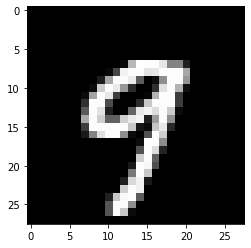

In [9]:
plt.imshow(image,cmap='gray')
print(lable)

In [10]:
from torchvision.transforms import transforms

In [11]:
dataset=MNIST(root="data/",transform=transforms.ToTensor())

In [12]:
img_tensor,lable=dataset[0]

In [13]:
img_tensor.shape

torch.Size([1, 28, 28])

In [14]:
lable

5

In [15]:
# plt.imshow(img_tensor)

In [16]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


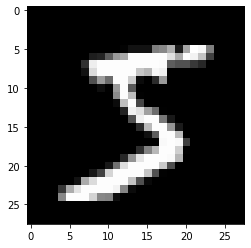

In [17]:
plt.imshow(img_tensor[0,:,:],cmap='gray')

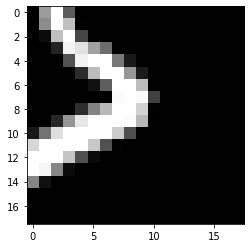

In [18]:
plt.imshow(img_tensor[0,10:28,10:28],cmap='gray')

In [19]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])

In [20]:
print(len(train_ds),len(val_ds))

50000 10000


In [21]:
# ?random_split

In [22]:
from torch.utils.data import DataLoader

In [23]:
batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)

In [24]:
import torch.nn as nn

In [25]:
input_size=28*28*1
num_classes=10
model=nn.Linear(input_size,num_classes)

In [26]:
print(model.weight)

Parameter containing:
tensor([[-2.0895e-02,  3.0517e-02, -1.7244e-02,  ..., -7.8107e-03,
          1.5433e-02, -2.4329e-02],
        [-2.4303e-02, -1.1792e-02,  1.0349e-02,  ...,  8.7193e-05,
          5.8556e-03, -6.7801e-03],
        [ 2.8788e-02, -4.5600e-03, -1.6493e-03,  ..., -3.0570e-02,
          3.0955e-02,  7.5162e-03],
        ...,
        [ 3.2949e-02,  7.3646e-03, -4.5361e-03,  ...,  1.7609e-02,
         -3.4302e-02, -3.4834e-03],
        [ 2.8752e-03, -2.4102e-02, -8.6137e-03,  ...,  3.5428e-03,
          3.2597e-02, -3.0782e-02],
        [-2.7804e-02,  1.1439e-02,  3.6525e-03,  ...,  1.1376e-02,
          2.7002e-02,  2.0787e-02]], requires_grad=True)


In [27]:
print(model.bias)

Parameter containing:
tensor([-0.0196,  0.0276, -0.0010,  0.0292, -0.0287, -0.0121, -0.0119,  0.0353,
         0.0177, -0.0131], requires_grad=True)


In [28]:
# for images, labels in train_loader:
#     print(labels)
#     print(images.shape)
#     outputs = model(images)
#     print(outputs)
#     break

In [29]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.liner=nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.liner(xb)
        return out
print(input_size)
print(num_classes)

784
10


In [30]:
model=MnistModel()

In [31]:
model.liner.weight

Parameter containing:
tensor([[ 0.0207,  0.0165,  0.0267,  ..., -0.0079,  0.0039, -0.0086],
        [ 0.0315,  0.0256,  0.0251,  ...,  0.0266,  0.0148, -0.0324],
        [-0.0187,  0.0116,  0.0111,  ..., -0.0357, -0.0266,  0.0036],
        ...,
        [-0.0317, -0.0228,  0.0040,  ...,  0.0177, -0.0090, -0.0342],
        [ 0.0197,  0.0089, -0.0170,  ..., -0.0353, -0.0237,  0.0170],
        [ 0.0169,  0.0196,  0.0086,  ..., -0.0003, -0.0027, -0.0079]],
       requires_grad=True)

In [32]:
model.liner.bias

Parameter containing:
tensor([-0.0036,  0.0036, -0.0043,  0.0296,  0.0112,  0.0346, -0.0187,  0.0217,
        -0.0287,  0.0007], requires_grad=True)

In [33]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0207,  0.0165,  0.0267,  ..., -0.0079,  0.0039, -0.0086],
         [ 0.0315,  0.0256,  0.0251,  ...,  0.0266,  0.0148, -0.0324],
         [-0.0187,  0.0116,  0.0111,  ..., -0.0357, -0.0266,  0.0036],
         ...,
         [-0.0317, -0.0228,  0.0040,  ...,  0.0177, -0.0090, -0.0342],
         [ 0.0197,  0.0089, -0.0170,  ..., -0.0353, -0.0237,  0.0170],
         [ 0.0169,  0.0196,  0.0086,  ..., -0.0003, -0.0027, -0.0079]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0036,  0.0036, -0.0043,  0.0296,  0.0112,  0.0346, -0.0187,  0.0217,
         -0.0287,  0.0007], requires_grad=True)]

In [34]:
for images,labels in train_loader:
    print(images.shape)
    output=model(images)
    print(output.shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])


In [35]:
print('outputs.shape : ', output.shape)
print('Sample outputs :\n', output[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0108, -0.3705,  0.1560, -0.0728,  0.1066,  0.0037, -0.6705, -0.0169,
         -0.2148,  0.6215],
        [ 0.0807, -0.0029, -0.1092,  0.0077,  0.0107,  0.2103, -0.2319, -0.0575,
         -0.3357,  0.2942]])


In [36]:
!clear

In [37]:
import torch.nn.functional as F

In [38]:
probs=F.softmax(output,dim=1)

In [39]:
probs.shape

torch.Size([128, 10])

In [40]:
max_probs,pred=torch.max(probs,dim=1)

In [41]:
max_probs

tensor([0.1847, 0.1339, 0.1891, 0.1379, 0.1204, 0.1368, 0.1364, 0.1472, 0.1375,
        0.1193, 0.1363, 0.2100, 0.1445, 0.1465, 0.1455, 0.1460, 0.1419, 0.1695,
        0.1328, 0.1340, 0.1306, 0.1504, 0.1299, 0.1335, 0.1410, 0.1584, 0.1400,
        0.1367, 0.1331, 0.1302, 0.1342, 0.1512, 0.1405, 0.1660, 0.1721, 0.1279,
        0.1479, 0.1430, 0.1676, 0.1587, 0.1483, 0.1643, 0.1235, 0.1201, 0.1528,
        0.1559, 0.1870, 0.1607, 0.1230, 0.1307, 0.1694, 0.1768, 0.1225, 0.1345,
        0.1639, 0.1205, 0.1294, 0.1326, 0.1389, 0.1486, 0.1528, 0.1617, 0.1238,
        0.1146, 0.1151, 0.1253, 0.1651, 0.1477, 0.1256, 0.1726, 0.1305, 0.1390,
        0.2050, 0.1704, 0.1498, 0.1570, 0.1349, 0.1517, 0.1309, 0.1325, 0.1351,
        0.1157, 0.1570, 0.1266, 0.1653, 0.1388, 0.1259, 0.1269, 0.1205, 0.1353,
        0.1473, 0.1195, 0.1368, 0.1445, 0.1564, 0.1528, 0.1789, 0.1266, 0.1380,
        0.1421, 0.1302, 0.1273, 0.1309, 0.1993, 0.1435, 0.1610, 0.1228, 0.1400,
        0.1167, 0.1314, 0.1534, 0.1439, 

In [42]:
pred.shape

torch.Size([128])

In [43]:
labels.shape

torch.Size([128])

In [44]:
output[:2]

tensor([[ 0.0108, -0.3705,  0.1560, -0.0728,  0.1066,  0.0037, -0.6705, -0.0169,
         -0.2148,  0.6215],
        [ 0.0807, -0.0029, -0.1092,  0.0077,  0.0107,  0.2103, -0.2319, -0.0575,
         -0.3357,  0.2942]], grad_fn=<SliceBackward0>)

In [45]:
torch.sum(pred==labels)

tensor(5)

In [46]:
def accuracy(output,labels):
    _,pred=torch.max(output,dim=1)
    return torch.tensor(torch.sum(pred==labels).item()/len(pred))

In [47]:
accuracy(output,labels)

tensor(0.0391)

In [48]:
loss_fn=F.cross_entropy

In [49]:
# ?F.cross_entropy

In [50]:
loss=loss_fn(output,labels)
loss

tensor(2.3549, grad_fn=<NllLossBackward0>)

In [51]:
# ?nn.Module

In [52]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linier=nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.linier(xb)
        return out
    def traning_step(self,batch):
        image,label=batch
        out=self(image)
        loss=F.cross_entropy(out,label)
        return loss
    def validation_step(self,batch):
        image,label=batch
        out=self(image)
        loss=F.cross_entropy(out,label)
        acc=accuracy(out,label)
        return {'val_loss':loss,'val_acc':acc}
    def validation_epoch_end(self,output):
        batch_losses=[x['val_loss'] for x in output]
        ecops_loss=torch.stack(batch_losses).mean()
        batch_acc=[x['val_acc'] for x in output]
        ecops_acc=torch.stack(batch_acc).mean()
        return {'val_loss':ecops_loss.item(),'val_acc':ecops_acc.item()}
    def ecoph_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


In [53]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [54]:
def fit(ecops,lr,model,train_loder,val_loder,opt_fnc=torch.optim.SGD):
    optimizer=opt_fnc(model.parameters(),lr)
    history=[]
    
    for ecop in range(ecops):
        for batch in train_loader:
            loss=model.traning_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result=evaluate(model,val_loader)
        model.ecoph_end(ecop,result)
        history.append(result)
    return history


In [55]:
model=MnistModel()

In [56]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9657, val_acc: 0.6225
Epoch [1], val_loss: 1.6921, val_acc: 0.7324
Epoch [2], val_loss: 1.4878, val_acc: 0.7656
Epoch [3], val_loss: 1.3338, val_acc: 0.7852
Epoch [4], val_loss: 1.2157, val_acc: 0.7978


In [58]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.0647, val_acc: 0.8097
Epoch [1], val_loss: 1.0013, val_acc: 0.8150
Epoch [2], val_loss: 0.9489, val_acc: 0.8204
Epoch [3], val_loss: 0.9048, val_acc: 0.8259
Epoch [4], val_loss: 0.8671, val_acc: 0.8297


In [59]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8347, val_acc: 0.8329
Epoch [1], val_loss: 0.8064, val_acc: 0.8351
Epoch [2], val_loss: 0.7814, val_acc: 0.8378
Epoch [3], val_loss: 0.7593, val_acc: 0.8409
Epoch [4], val_loss: 0.7395, val_acc: 0.8423


In [60]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7217, val_acc: 0.8434
Epoch [1], val_loss: 0.7055, val_acc: 0.8445
Epoch [2], val_loss: 0.6908, val_acc: 0.8465
Epoch [3], val_loss: 0.6774, val_acc: 0.8484
Epoch [4], val_loss: 0.6651, val_acc: 0.8493


In [61]:
def predict_image(model,image):
    xb=image.unsqueeze(0)
    yb=model(xb)
    _,pred=torch.max(yb,dim=1)
    return pred[0].item()

In [62]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Label: 6 , Predicted: 6


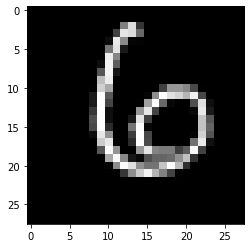

In [63]:
img, label = test_dataset[100]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image( model,img))

Label: 7 , Predicted: 7


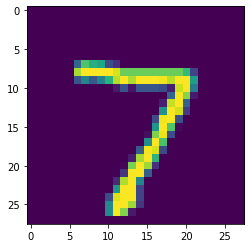

Label: 2 , Predicted: 2


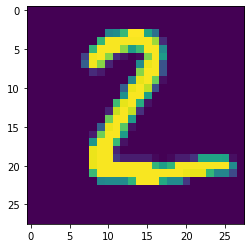

Label: 1 , Predicted: 1


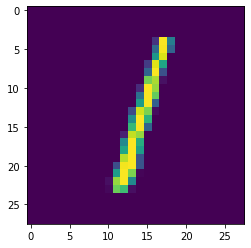

Label: 0 , Predicted: 0


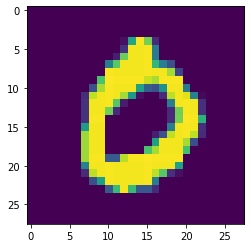

Label: 4 , Predicted: 4


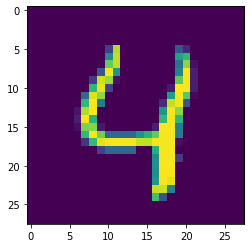

In [64]:
for i in range(5):
    img, label = test_dataset[i]
    plt.imshow(img[0])
    print('Label:', label, ', Predicted:', predict_image( model,img))
    plt.show()
